In [193]:
#Problem statement - To check the recovered rate

In [194]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder

In [ ]:
#importing libraries

In [195]:
df=pd.read_csv('COVID19Dataset')
df.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-05-21 02:32:54,32.3182,-86.9023,13052,522,NaN,12530.0,1,266.194321,164450.0,1493.0,3.999387,84000001,USA,3353.942386,11.438860
1,Alaska,US,2020-05-21 02:32:54,61.3707,-152.4044,401,10,352.0,39.0,2,54.815493,37045.0,NaN,2.493766,84000002,USA,5063.940017,NaN
2,American Samoa,US,2020-05-21 02:32:54,-14.2710,-170.1320,0,0,NaN,0.0,60,0.000000,124.0,NaN,NaN,16,ASM,222.857246,NaN
3,Arizona,US,2020-05-21 02:32:54,33.7298,-111.4312,14906,747,3773.0,10386.0,4,204.788838,165435.0,1792.0,5.011405,84000004,USA,2272.859351,12.022005
4,Arkansas,US,2020-05-21 02:32:54,34.9697,-92.3731,5003,107,3852.0,1044.0,5,165.782801,96258.0,535.0,2.138717,84000005,USA,3189.670370,10.693584


In [ ]:
# loading the dataset

In [196]:
df['Confirmed'].unique()

array([ 13052,    401,      0,  14906,   5003,  85997,  22797,  39017,
         8194,     49,   7551,  47471,  39801,    103,    154,    643,
         2506, 100418,  29274,  15620,   8507,   8167,  35316,   1819,
        42323,  88970,  53009,  17670,  11967,  11528,    478,  11122,
         7388,   3868, 150776,   6317, 354370,  20262,   2095,     21,
        29436,   5532,   3801,  68126,   2866,  13356,   9175,   4177,
        18412,  51673,   7710,    944,     69,  32908,  18971,   1567,
        13413,    787], dtype=int64)

In [ ]:
#checking the unique values of confirmed cases

In [197]:
df['Recovered'].unique()

array([       nan, 3.5200e+02, 3.7730e+03, 3.8520e+03, 3.4780e+03,
       6.2640e+03, 3.9650e+03, 1.0590e+03, 1.2500e+02, 5.7800e+02,
       1.6680e+03, 8.3620e+03, 4.7300e+02, 2.8260e+03, 2.6249e+04,
       1.1000e+03, 2.9930e+03, 2.8234e+04, 1.2227e+04, 7.6810e+03,
       4.4000e+02, 3.3600e+02, 1.2750e+03, 2.3945e+04, 1.8820e+03,
       6.1886e+04, 1.1637e+04, 1.3020e+03, 1.3000e+01, 4.2660e+03,
       1.4060e+03, 1.0300e+03, 5.4510e+03, 3.0230e+03, 1.1783e+04,
       3.0341e+04, 4.4230e+03, 8.2400e+02, 6.1000e+01, 4.5230e+03,
       9.5000e+02, 7.7280e+03, 5.2800e+02])

In [ ]:
#checking the unique values of recovered cases

In [198]:
"""
Field description
Province_State - The name of the State within the USA.
Country_Region - The name of the Country (US).
Last_Update - The most recent date the file was pushed.
Lat - Latitude.
Long_ - Longitude.
Confirmed - Aggregated confirmed case count for the state.
Deaths - Aggregated Death case count for the state.
Recovered - Aggregated Recovered case count for the state.
Active - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).
FIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.
Incident_Rate - confirmed cases per 100,000 persons.
People_Tested - Total number of people who have been tested.
People_Hospitalized - Total number of people hospitalized.
Mortality_Rate - Number recorded deaths * 100/ Number confirmed cases.
UID - Unique Identifier for each row entry.
ISO3 - Officialy assigned country code identifiers.
Testing_Rate - Total number of people tested per 100,000 persons.
Hospitalization_Rate - Total number of people hospitalized * 100/ Number of confirmed cases.
"""

'\nField description\nProvince_State - The name of the State within the USA.\nCountry_Region - The name of the Country (US).\nLast_Update - The most recent date the file was pushed.\nLat - Latitude.\nLong_ - Longitude.\nConfirmed - Aggregated confirmed case count for the state.\nDeaths - Aggregated Death case count for the state.\nRecovered - Aggregated Recovered case count for the state.\nActive - Aggregated confirmed cases that have not been resolved (Active = Confirmed - Recovered - Deaths).\nFIPS - Federal Information Processing Standards code that uniquely identifies counties within the USA.\nIncident_Rate - confirmed cases per 100,000 persons.\nPeople_Tested - Total number of people who have been tested.\nPeople_Hospitalized - Total number of people hospitalized.\nMortality_Rate - Number recorded deaths * 100/ Number confirmed cases.\nUID - Unique Identifier for each row entry.\nISO3 - Officialy assigned country code identifiers.\nTesting_Rate - Total number of people tested per 

In [199]:
df.shape

(58, 18)

In [ ]:
#checking the shape

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Province_State        58 non-null     object 
 1   Country_Region        58 non-null     object 
 2   Last_Update           58 non-null     object 
 3   Lat                   56 non-null     float64
 4   Long_                 56 non-null     float64
 5   Confirmed             58 non-null     int64  
 6   Deaths                58 non-null     int64  
 7   Recovered             42 non-null     float64
 8   Active                58 non-null     float64
 9   FIPS                  58 non-null     int64  
 10  Incident_Rate         56 non-null     float64
 11  People_Tested         56 non-null     float64
 12  People_Hospitalized   33 non-null     float64
 13  Mortality_Rate        57 non-null     float64
 14  UID                   58 non-null     int64  
 15  ISO3                  58 

In [ ]:
#checking the data type

In [201]:
df.isnull().sum()

Province_State           0
Country_Region           0
Last_Update              0
Lat                      2
Long_                    2
Confirmed                0
Deaths                   0
Recovered               16
Active                   0
FIPS                     0
Incident_Rate            2
People_Tested            2
People_Hospitalized     25
Mortality_Rate           1
UID                      0
ISO3                     0
Testing_Rate             2
Hospitalization_Rate    25
dtype: int64

In [ ]:
#checking the null values and filling with mean below as they are numeric type

In [202]:
col=['Testing_Rate','Incident_Rate','People_Tested','Lat','Long_','Mortality_Rate','Recovered','People_Hospitalized','Hospitalization_Rate']
df[col]=df[col].fillna((df[col].mean()))

In [203]:
df.isnull().sum()

Province_State          0
Country_Region          0
Last_Update             0
Lat                     0
Long_                   0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
FIPS                    0
Incident_Rate           0
People_Tested           0
People_Hospitalized     0
Mortality_Rate          0
UID                     0
ISO3                    0
Testing_Rate            0
Hospitalization_Rate    0
dtype: int64

In [ ]:
#rechecking the null values

In [204]:
for column in df.columns:
    if df[column].dtype==object:
        print(str(column) +':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('*********************************************')
        print('\n')

Province_State:['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'Connecticut' 'Delaware' 'Diamond Princess'
 'District of Columbia' 'Florida' 'Georgia' 'Grand Princess' 'Guam'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Northern Mariana Islands' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Puerto Rico' 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee'
 'Texas' 'Utah' 'Vermont' 'Virgin Islands' 'Virginia' 'Washington'
 'West Virginia' 'Wisconsin' 'Wyoming']
Grand Princess              1
Utah                        1
Northern Mariana Islands    1
California                  1
Massachusetts               1
Colorado                    1
Rhode Island                1
New York                    1
District of Columbia

In [ ]:
#checking the unique values using loop

In [205]:
le= LabelEncoder()
df['Province_State']=le.fit_transform(df['Province_State'])
df['ISO3']=le.fit_transform(df['ISO3'])

In [ ]:
#converting 'Province_State' & 'ISO3' into numeric through labelencoder

In [206]:
df.drop(['Last_Update','Country_Region'],axis=1,inplace=True)
df.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,7007.428571,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,352.000000,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
2,2,-14.2710,-170.1320,0,0,7007.428571,0.0,60,0.000000,124.0,4897.454545,4.458248,16,0,222.857246,14.342541
3,3,33.7298,-111.4312,14906,747,3773.000000,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,3852.000000,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584


In [ ]:
#dropping the above columns as there is only one value which will have no correlation with the target

In [208]:
dfcor=df.corr()
dfcor

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
Province_State,1.000000,0.153948,0.089445,0.006490,0.015229,0.067595,-0.027612,-0.195045,-0.078280,-0.065428,5.461319e-03,0.019090,-3.133086e-02,1.967772e-01,0.083183,-1.316941e-01
Lat,0.153948,1.000000,-0.278274,0.120391,0.119685,0.030196,0.119635,-0.000404,0.245693,0.084769,2.645628e-02,-0.134906,7.727677e-01,7.244034e-01,0.309579,-6.625465e-02
Long_,0.089445,-0.278274,1.000000,0.009951,0.028690,-0.041588,0.011604,0.000396,0.041318,-0.077781,7.967739e-02,0.297192,-5.259975e-01,-4.036427e-01,0.190191,7.138145e-02
Confirmed,0.006490,0.120391,0.009951,1.000000,0.982191,0.822547,0.985218,-0.096696,0.708436,0.824136,8.692673e-01,0.382537,1.539717e-01,1.099993e-01,0.332464,2.874708e-01
Deaths,0.015229,0.119685,0.028690,0.982191,1.000000,0.830223,0.954378,-0.075053,0.710105,0.739634,9.082786e-01,0.427127,1.200429e-01,8.558846e-02,0.344465,2.982254e-01
Recovered,0.067595,0.030196,-0.041588,0.822547,0.830223,1.000000,0.725085,-0.000012,0.542795,0.711255,7.618294e-01,0.322160,1.303142e-01,6.807968e-02,0.220597,2.316917e-01
Active,-0.027612,0.119635,0.011604,0.985218,0.954378,0.725085,1.000000,-0.092276,0.700926,0.826144,8.359377e-01,0.367626,1.463538e-01,1.048243e-01,0.321395,2.845637e-01
FIPS,-0.195045,-0.000404,0.000396,-0.096696,-0.075053,-0.000012,-0.092276,1.000000,-0.000237,-0.000209,9.150251e-06,-0.262178,5.802216e-02,4.058567e-02,-0.000100,-1.176128e-04
Incident_Rate,-0.078280,0.245693,0.041318,0.708436,0.710105,0.542795,0.700926,-0.000237,1.000000,0.441669,5.510764e-01,0.353882,2.643102e-01,1.954154e-01,0.620621,1.960289e-01
People_Tested,-0.065428,0.084769,-0.077781,0.824136,0.739634,0.711255,0.826144,-0.000209,0.441669,1.000000,6.420913e-01,0.220200,2.356350e-01,1.665665e-01,0.230753,2.526802e-01


In [ ]:
#There is more or less uniform correlation with the target column recovered except Province_State.Lat,Long,Fips
#Graphically representing the same through heatmap

<AxesSubplot:>

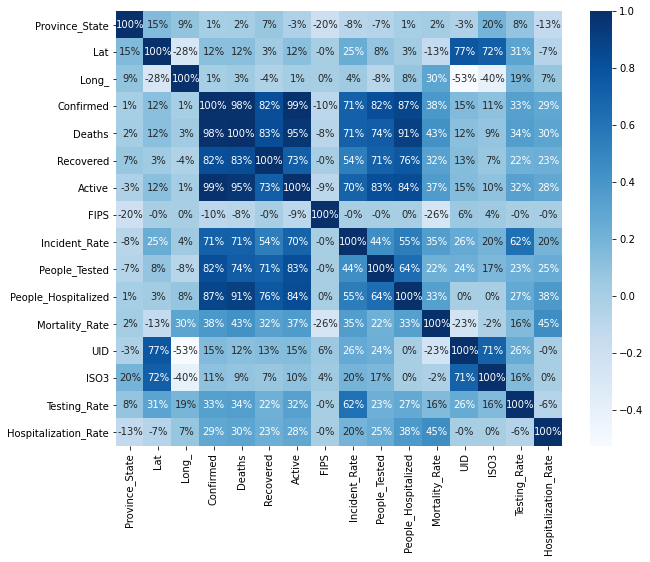

In [209]:
plt.figure(figsize=(10,8))
sns.heatmap(dfcor,annot=True,fmt='.0%',cmap='Blues')

Text(0.5, 1.0, 'Correlation with target variable')

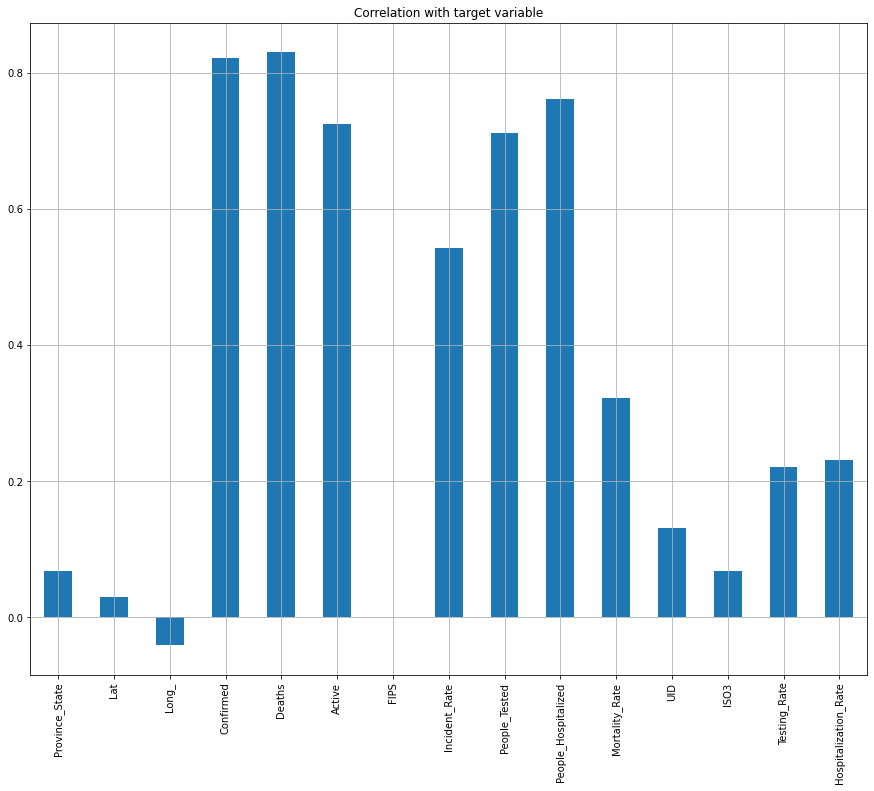

In [210]:
plt.figure(figsize=(15,12))
df.drop('Recovered',axis=1).corrwith(df['Recovered']).plot(kind='bar',grid=True)
plt.xticks(rotation=90)
plt.title("Correlation with target variable")

In [ ]:
#Checking the corrlelation with the target colum

In [211]:
df.columns

Index(['Province_State', 'Lat', 'Long_', 'Confirmed', 'Deaths', 'Recovered',
       'Active', 'FIPS', 'Incident_Rate', 'People_Tested',
       'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3', 'Testing_Rate',
       'Hospitalization_Rate'],
      dtype='object')

In [ ]:
#checking the columns

Univariate Analysis

<AxesSubplot:xlabel='People_Tested', ylabel='Density'>

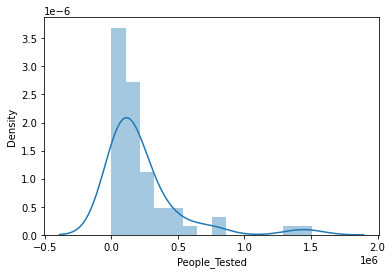

In [212]:
sns.distplot(df['People_Tested'])

In [ ]:
#People tested ratio is right skewed, positvely,mean is more to the median

<AxesSubplot:xlabel='Incident_Rate', ylabel='Density'>

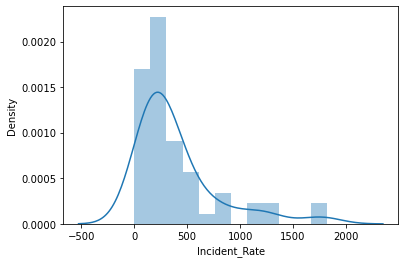

In [213]:
sns.distplot(df['Incident_Rate'])

In [ ]:
#Incident rate ratio is right skewed, positvely,mean is more to the median

{'bodies': [<matplotlib.collections.PolyCollection at 0x25fd3732ee0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x25fd3732d30>,
 'cmins': <matplotlib.collections.LineCollection at 0x25fd373f3d0>,
 'cbars': <matplotlib.collections.LineCollection at 0x25fd373f190>}

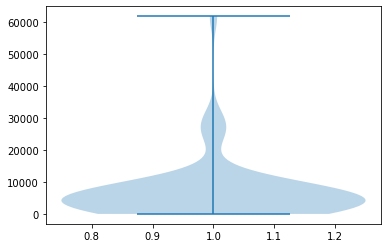

In [214]:
plt.violinplot(df['Recovered'])

In [ ]:
# recovered cases lies majorly between 10k

<AxesSubplot:xlabel='Hospitalization_Rate', ylabel='Density'>

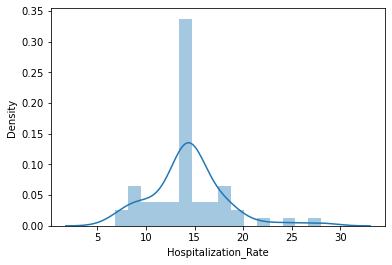

In [216]:
sns.distplot(df['Hospitalization_Rate'])

In [ ]:
# Hospitalized rate is uniform in nature

<AxesSubplot:xlabel='Mortality_Rate', ylabel='Density'>

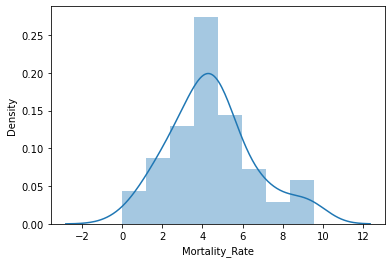

In [217]:
sns.distplot(df['Mortality_Rate'])

In [ ]:
#Mortality rate is also uniform in nature

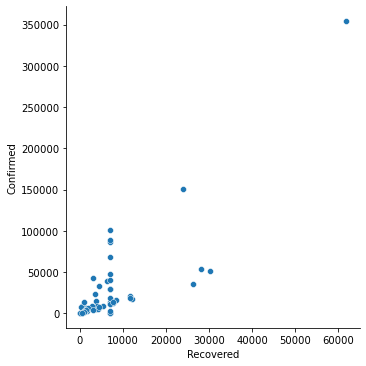

In [218]:
sns.relplot(x='Recovered',y='Confirmed',data=df)

In [ ]:
#recovered vs confirmed has direct relationship and there seems to be outliers present
#majority of the data lies with 30k

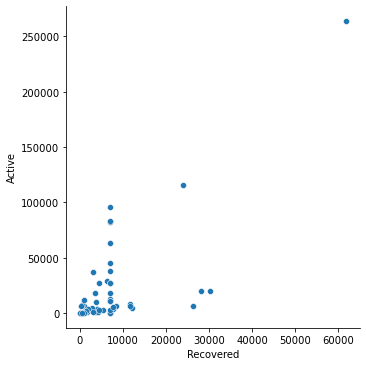

In [219]:
sns.relplot(x='Recovered',y='Active',data=df)

In [ ]:
#recovered vs active ratio is positively correlated with outliters present
#majority of the data lies with 30k

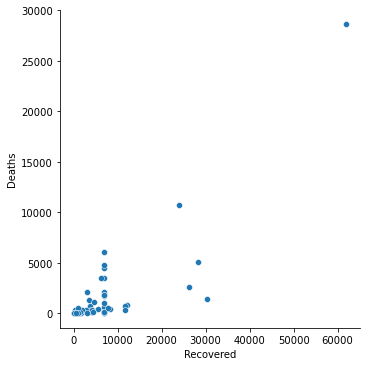

In [220]:
sns.relplot(x='Recovered',y='Deaths',data=df)

In [ ]:
#recovered vs deaths ratio is positively correlated with outliters present
#majority of the data lies with 30k

In [221]:
df.describe()

,Province_State,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,5.800000e+01,58.000000,58.000000,5.800000e+01,58.000000,58.000000,58.000000
mean,28.500000,36.840089,-85.206614,26756.086207,1611.017241,7007.428571,20070.724138,3288.086207,396.230806,2.258534e+05,4897.454545,4.458248,7.676194e+07,3.844828,3894.186870,14.342541
std,16.886879,10.694329,48.873770,52562.031122,4084.750891,9901.304545,41294.705318,17408.350591,395.554852,2.934948e+05,9879.577790,2.116191,2.378302e+07,0.720665,1898.951207,3.781861
min,0.000000,-14.271000,-170.132000,0.000000,0.000000,13.000000,0.000000,1.000000,0.000000,1.240000e+02,65.000000,0.000000,1.600000e+01,0.000000,97.702058,6.778043
25%,14.250000,34.872800,-99.697700,2596.000000,74.000000,1281.750000,812.500000,18.250000,154.909239,4.745000e+04,1454.500000,3.116158,8.400001e+07,4.000000,2741.843521,12.829963
50%,28.500000,38.978600,-86.797300,10148.500000,385.000000,4987.000000,5644.500000,32.500000,259.009335,1.433085e+05,4897.454545,4.409323,8.400003e+07,4.000000,3501.526835,14.342541
75%,42.750000,42.214075,-77.072550,29395.500000,1394.250000,7007.428571,19291.250000,47.750000,462.828082,2.646656e+05,4897.454545,5.450908,8.400004e+07,4.000000,4622.586404,15.552021
max,57.000000,61.370700,145.673900,354370.000000,28636.000000,61886.000000,263848.000000,99999.000000,1821.620216,1.505836e+06,76410.000000,9.545549,8.410000e+07,5.000000,11377.424693,28.054438


Province_State             AxesSubplot(0.125,0.772143;0.110714x0.107857)
Lat                     AxesSubplot(0.257857,0.772143;0.110714x0.107857)
Long_                   AxesSubplot(0.390714,0.772143;0.110714x0.107857)
Confirmed               AxesSubplot(0.523571,0.772143;0.110714x0.107857)
Deaths                  AxesSubplot(0.656429,0.772143;0.110714x0.107857)
Recovered               AxesSubplot(0.789286,0.772143;0.110714x0.107857)
Active                     AxesSubplot(0.125,0.642714;0.110714x0.107857)
FIPS                    AxesSubplot(0.257857,0.642714;0.110714x0.107857)
Incident_Rate           AxesSubplot(0.390714,0.642714;0.110714x0.107857)
People_Tested           AxesSubplot(0.523571,0.642714;0.110714x0.107857)
People_Hospitalized     AxesSubplot(0.656429,0.642714;0.110714x0.107857)
Mortality_Rate          AxesSubplot(0.789286,0.642714;0.110714x0.107857)
UID                        AxesSubplot(0.125,0.513286;0.110714x0.107857)
ISO3                    AxesSubplot(0.257857,0.5132

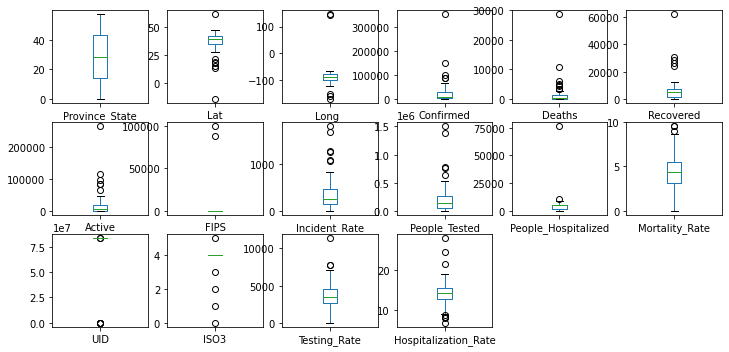

In [222]:
df.plot(kind='box',subplots=True,layout=(6,6),figsize=(12,12))

In [ ]:
#oultiers seems to be present in most the columns

In [223]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape


(58, 16)

In [224]:
threshold=3
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(58, 16)
(46, 16)


In [225]:
Percentage_Loss_data=(((58-46)/58)*100)
Percentage_Loss_data

20.689655172413794

In [ ]:
#removing the outliers as the data is widely discpersed

In [263]:
df_new.skew()

Province_State         -0.006325
Lat                     0.276390
Long_                  -1.452557
Confirmed               1.916809
Deaths                  2.182344
Recovered               2.386170
Active                  2.432932
FIPS                    0.004318
Incident_Rate           1.705832
People_Tested           1.769735
People_Hospitalized     0.321958
Mortality_Rate          0.397815
UID                     0.004318
ISO3                    0.000000
Testing_Rate            1.281475
Hospitalization_Rate    0.163926
dtype: float64

In [ ]:
# the dataset seems to skewed
#splitting the dataset into x and y 

In [264]:
x=df_new.drop('Recovered',axis=1)
x.head()

,Province_State,Lat,Long_,Confirmed,Deaths,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,0,32.3182,-86.9023,13052,522,12530.0,1,266.194321,164450.0,1493.000000,3.999387,84000001,4,3353.942386,11.438860
1,1,61.3707,-152.4044,401,10,39.0,2,54.815493,37045.0,4897.454545,2.493766,84000002,4,5063.940017,14.342541
3,3,33.7298,-111.4312,14906,747,10386.0,4,204.788838,165435.0,1792.000000,5.011405,84000004,4,2272.859351,12.022005
4,4,34.9697,-92.3731,5003,107,1044.0,5,165.782801,96258.0,535.000000,2.138717,84000005,4,3189.670370,10.693584
6,6,39.0598,-105.3111,22797,1299,18020.0,8,395.868121,131837.0,3955.000000,5.698118,84000008,4,2289.339188,17.348774


In [265]:
y=df_new.Recovered
y.head()

0    7007.428571
1     352.000000
3    3773.000000
4    3852.000000
6    3478.000000
Name: Recovered, dtype: float64

In [266]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')

In [ ]:
#removing the skewness through power transform

In [267]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)


In [ ]:
#scaling the data

In [268]:
#Importing all the model Library
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

#Importing all the Boosting models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

#Importing error metrics
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [269]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100} found on random state {best_rstate}")

Best accuracy 84.6651983615575 found on random state 138


In [ ]:
#the random state is 138 with score of 84 with linear regression

In [270]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=138)

In [ ]:
#splitting the dataset into 80, 2o ratio with best random state 138
#checking the shapes below

In [271]:
print(x_train.shape,'\t\t',x_test.shape)

(36, 15) 		 (10, 15)


In [272]:
print(y_train.shape,'\t\t',y_test.shape)

(36,) 		 (10,)


In [273]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    m.fit(x_train,y_train)
    score=m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Score of ',m,'is:')
    print('MAE :',mean_absolute_error(y_test,predm))
    print('MSE :',mean_squared_error(y_test,predm))
    print('RSME :',np.sqrt(mean_squared_error(y_test,predm)))
    print('R2_score :',r2_score(y_test,predm)*100)
    print('**************************************************')
    print('\n')

Score of  LinearRegression() is:
MAE : 1401.3181178927714
MSE : 2813363.0120776454
RSME : 1677.3082638792564
R2_score : 84.6651983615575
**************************************************


Score of  SVR() is:
MAE : 3856.5459027515126
MSE : 18400117.089369737
RSME : 4289.535766183764
R2_score : -0.2935435200828618
**************************************************


Score of  DecisionTreeRegressor() is:
MAE : 1318.9428571428573
MSE : 3258927.032653061
RSME : 1805.2498532483146
R2_score : 82.23656194193491
**************************************************


Score of  KNeighborsRegressor() is:
MAE : 2169.2057142857143
MSE : 7563940.630040817
RSME : 2750.2619202615624
R2_score : 58.77121840705054
**************************************************


Score of  Lasso() is:
MAE : 1304.299167427373
MSE : 2683806.7823406835
RSME : 1638.232822995768
R2_score : 85.37137068113087
**************************************************


Score of  Ridge() is:
MAE : 1355.6154349784836
MSE : 2611499.9238

In [274]:
model=[LinearRegression(),SVR(),DecisionTreeRegressor(),KNeighborsRegressor(),Lasso(),Ridge(),ElasticNet(),
       RandomForestRegressor(),AdaBoostRegressor(),GradientBoostingRegressor()]

for m in model:
    score=cross_val_score(m,x,y,cv=10,scoring='r2')
    print('Model:',m)
    print('Score:',score)
    print('Mean Score:',score.mean())
    print('Standard Deviation:',score.std())
    print('**************************************************')
    print('\n')

Model: LinearRegression()
Score: [-12.75652241  -0.32704716   0.36766116   0.69774958   0.6222501
   0.1550968   -1.14999152  -0.15975631   0.51458635  -1.38508822]
Mean Score: -1.3421061621146178
Standard Deviation: 3.8650728955037534
**************************************************


Model: SVR()
Score: [-1.53339629e-01 -3.17909918e-02 -3.86715786e-02 -1.50092215e-01
 -5.84909996e-01  6.88252111e-04 -1.70166164e-01 -7.10740067e-01
 -2.49760496e-01 -6.48147612e-03]
Mean Score: -0.20952643611510186
Standard Deviation: 0.23413330750357783
**************************************************


Model: DecisionTreeRegressor()
Score: [-6.19074216e-01 -2.63315962e+01  7.03587817e-01  5.03263380e-01
  8.57131462e-01  9.33898987e-01  2.47710679e-02  2.14192716e-01
  1.48687767e-02  4.55972873e-01]
Mean Score: -2.3242983354835007
Standard Deviation: 8.014501611032394
**************************************************


Model: KNeighborsRegressor()
Score: [ 0.07017241 -2.0981101  -0.67297477  0.

In [ ]:
#linear regression seems to be give the best accuracy

In [275]:
parameters = {"fit_intercept":[True,False],
              "n_jobs":[1,4]
             }

In [276]:
from sklearn.model_selection import GridSearchCV
lr=LinearRegression()

In [278]:
lr=LinearRegression()

In [282]:
clf = GridSearchCV(lr,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'fit_intercept': True, 'n_jobs': 1}


In [283]:
pred=clf.predict(x_test)
print("Final accuracy :",r2_score(y_test,pred)*100)

Final accuracy : 84.6651983615575


In [ ]:
#Hypertuning the model with GridsearchCV with r2score of 84 percent

In [284]:
import joblib
filename='model.pkl'
joblib.dump(clf,open(filename,'wb'))

In [ ]:
#saving the model